In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# Probabilidad

**Experimento aleatorio**: experimento del que tenemos una incertidumbre en su resultado. La **probabilidad** cuantifica el grado de certidumbre de cada resultado posible del experimento. Para ello debemos conocer cuáles son los resultados posibles del experimento.

* **Definición clásica probabilidad**: la probabilidad de un resultado se calcula analíticamente, considerando el cociente de casos favorables en los que se satisface el resultado en relación a la totalidad de casos posibles. Asume equiprobabilidad de los resultados elementales. Por ejemplo, <u>al lanzar un dado de seis caras hay seis resultados posibles, y la probabilidad de que salga cada una de ellas es de 1/6</u>. Sin embargo, si el dado está trucado y unas caras pesan más que otras esta definición ya no es útil.

* **Definición frecuencial de la probabilidad**: la probabilidad de un resultado se estima experimentalmente, repitiendo muchas veces el mismo experimento y calculando las frecuencias relativas de cada resultado. Aquí si podemos considerar tanto un dado correcto como uno trucado: al repetir el experimento podemos ver si unas caras son más probables que otras o si se mantienen equiprobables.

* **Definición axiomática de probabilidad**: se define un **espacio de probabilidad**, en el que el espacio muestral corresponde a cada uno de los resultados elementales posibles, y se asigna a cada uno de ellos una probabilidad. Por supuesto, las probabilidades no tienen por qué ser ifuales. Los **sucesos** son combinaciones de resultados elementales a los que se asignan probabilidades conforme a unas reglas determinadas.

Experimentemos lanzando un dado para obtener las probabilidades muestrales. Modelamos cada sucesión de lanzamientos mediante una **secuencia discreta**. Lanzaremos un dado bueno y otro trucado.

In [2]:
caras  = np.array([1,2,3,4,5,6])
P_dado = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
print('Probabilidades caras dado bueno:\n', P_dado)
print('Suma de probabilidades:', P_dado.sum().round(decimals=15))
P_dadoTrucado    = np.array([1/12, 1/12, 1/12, 1/12, 1/3, 1/3]).round(decimals=10)
P_dadoTrucado[5] = 1-P_dadoTrucado[0:5].sum()
print('Probabilidades caras dado trucado:\n', P_dadoTrucado)
print('Suma de probabilidades:', P_dadoTrucado.sum())
dadoTrucado      = stats.rv_discrete(values=(caras, P_dadoTrucado), name='dadoTrucado') 

Probabilidades caras dado bueno:
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Suma de probabilidades: 1.0
Probabilidades caras dado trucado:
 [0.08333333 0.08333333 0.08333333 0.08333333 0.33333333 0.33333333]
Suma de probabilidades: 1.0


* **Un lanzamiento**:

In [3]:
print('Dado bueno: ', np.random.randint(1,7,1))
print('Dado trucado: ', dadoTrucado.rvs(loc=0, size=1, random_state=None))

Dado bueno:  [5]
Dado trucado:  [5]


* **Cien lanzamientos**:

In [4]:
N=100
seq100 = np.random.randint(1,7,N)
print('Dado bueno (100 lanzamientos):\n', seq100)
seq100Trucado = dadoTrucado.rvs(loc=0, size=100, random_state=None)
print('Dado trucado (100 lanzamientos):\n', seq100Trucado)

Dado bueno (100 lanzamientos):
 [2 5 1 4 3 6 1 4 2 3 6 6 2 2 5 1 3 6 6 5 4 6 6 2 1 6 6 5 5 5 2 5 1 4 3 1 1
 1 1 3 4 5 5 6 3 5 2 3 3 6 3 2 5 6 1 1 4 3 4 3 4 5 4 6 5 1 5 4 6 2 3 6 4 2
 5 2 5 6 6 3 5 2 2 2 5 1 5 4 6 6 5 4 4 1 5 3 6 2 6 6]
Dado trucado (100 lanzamientos):
 [5 2 5 6 4 6 5 6 5 5 6 6 6 4 4 1 6 6 4 6 2 4 4 5 5 2 5 6 6 5 6 3 5 6 6 5 6
 4 2 4 1 6 6 6 6 6 5 5 1 4 5 2 6 4 5 1 4 5 5 5 5 5 2 5 6 5 5 5 3 5 1 4 5 5
 3 4 6 3 4 4 6 2 2 6 3 5 6 6 6 2 2 4 6 3 1 6 6 6 5 3]


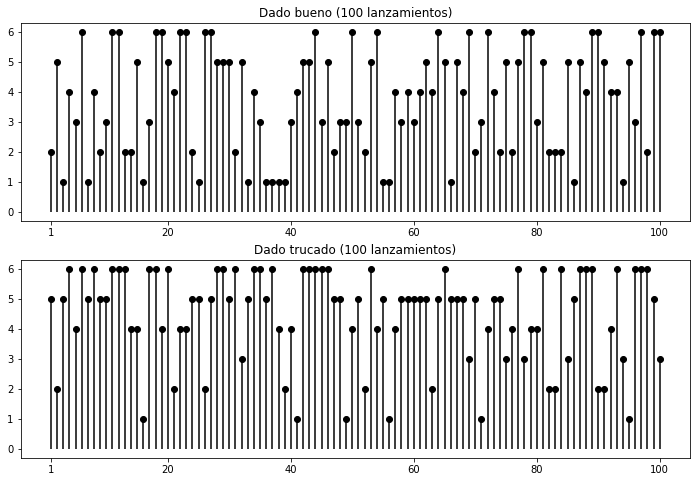

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
x=np.arange(1,N+1)
plt.plot(x,seq100,'ok')
plt.vlines(x,0,seq100);
xt,loc=plt.xticks()
xt[xt==0]=1
xt=xt[(xt<=N)&(xt>=1)]
plt.xticks(xt);
plt.title('Dado bueno (100 lanzamientos)')

plt.subplot(2,1,2)
plt.plot(x,seq100Trucado,'ok')
plt.vlines(x,0,seq100Trucado);
xt,loc=plt.xticks()
xt[xt==0]=1
xt=xt[(xt<=N)&(xt>=1)]
plt.xticks(xt);
plt.title('Dado trucado (100 lanzamientos)');

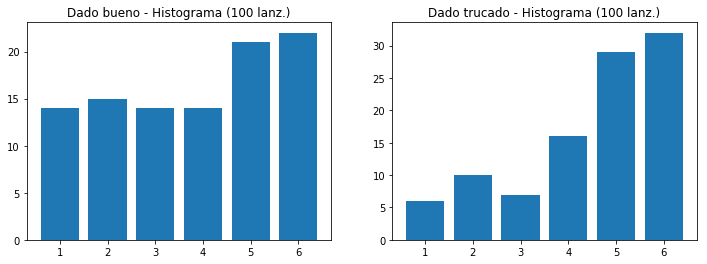

In [6]:
repet100        = np.bincount(seq100)[1:]
repet100Trucado = np.bincount(seq100Trucado)[1:]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(range(1,7),repet100)
plt.xticks([1,2,3,4,5,6])
plt.title('Dado bueno - Histograma (100 lanz.)');

plt.subplot(1,2,2)
plt.bar(range(1,7),repet100Trucado)
plt.xticks([1,2,3,4,5,6])
plt.title('Dado trucado - Histograma (100 lanz.)');

In [7]:
print('Probabilidades muestrales dado bueno: \n\t', repet100/N)
print('Probabilidades muestrales dado trucado:\n\t', repet100Trucado/N)

Probabilidades muestrales dado bueno: 
	 [0.14 0.15 0.14 0.14 0.21 0.22]
Probabilidades muestrales dado trucado:
	 [0.06 0.1  0.07 0.16 0.29 0.32]


* ***Mil lanzamientos***

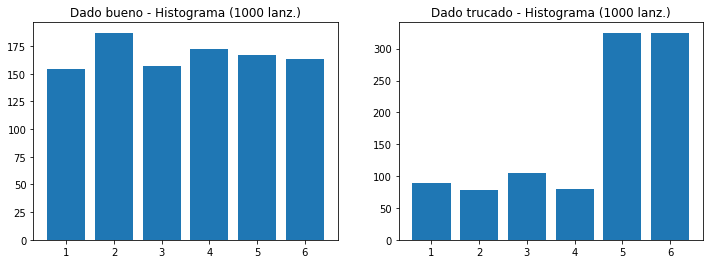

In [8]:
N=1000
seq1000          = np.random.randint(1,7,N)
repet1000        = np.bincount(seq1000)[1:]
seq1000Trucado   = dadoTrucado.rvs(loc=0, size=1000, random_state=None)
repet1000Trucado = np.bincount(seq1000Trucado)[1:]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(range(1,7),repet1000)
plt.title('Dado bueno - Histograma (1000 lanz.)');

plt.subplot(1,2,2)
plt.bar(range(1,7),repet1000Trucado)
plt.title('Dado trucado - Histograma (1000 lanz.)');

In [9]:
print('Probabilidades muestrales dado bueno: \n\t', repet1000/N)
print('Probabilidades muestrales dado trucado:\n\t', repet1000Trucado/N)

Probabilidades muestrales dado bueno: 
	 [0.154 0.187 0.157 0.172 0.167 0.163]
Probabilidades muestrales dado trucado:
	 [0.089 0.078 0.105 0.079 0.325 0.324]


* **Un millón de lanzamientos**

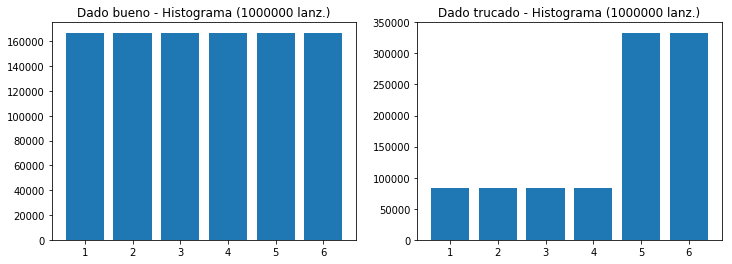

In [10]:
N=1000000
seq1000000          = np.random.randint(1,7,N)
repet1000000        = np.bincount(seq1000000)[1:]
seq1000000Trucado   = dadoTrucado.rvs(loc=0, size=1000000, random_state=None)
repet1000000Trucado = np.bincount(seq1000000Trucado)[1:]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(range(1,7),repet1000000)
plt.title('Dado bueno - Histograma (1000000 lanz.)');

plt.subplot(1,2,2)
plt.bar(range(1,7),repet1000000Trucado)
plt.title('Dado trucado - Histograma (1000000 lanz.)');

In [11]:
print('Probabilidades muestrales dado bueno: \n\t', repet1000000/N)
print('Probabilidades muestrales dado trucado:\n\t', repet1000000Trucado/N)

Probabilidades muestrales dado bueno: 
	 [0.166853 0.166814 0.166675 0.166483 0.166473 0.166702]
Probabilidades muestrales dado trucado:
	 [0.083301 0.083663 0.0835   0.083171 0.333043 0.333322]


## Espacio de probabilidad: lanzar un dado

* **Espacio muestral**: 1, 2, 3, 4, 5, 6

* **Probabilidades elementales**: P(1) = P(2) = P(3) = P(4) = P(5) = P(6) = 1/6

* **Sucesos**: son todos los subconjuntos que se puedan formar con los elementos del espacio muestral. A partir de la probabilidades elementales se asignan probabilidades a cada suceso conforme a las leyes conjuntistas de la probabilidad. <u>El suceso acontece si se verifica cualquiera de sus elementos</u>.

Siendo el espacio muestral finito de dimensión N=6, hay 2<sup>N</sup> = 2<sup>6</sup> = 64 sucesos posibles, que codificamos con palabras binarias de 6 bits.El bit más significativo corresponde al 6 y el menos al 1. Por ejemplo, el suceso "ha salido un número par, esto es, 6, 4 ó 2, se codifica como [1, 0, 1, 0, 1, 0].


In [12]:
elementos = ['uno','dos','tres','cuatro','cinco','seis']
uno, dos, tres, cuatro, cinco, seis = 0,1,2,3,4,5

S = np.array([[1,0,0,0,0,0],
              [0,1,0,0,0,0],
              [0,0,1,0,0,0],
              [0,0,0,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1]])

print('Probabilidades elementales del espacio muestral:\n')
for i, cara in enumerate(elementos):
    print('Probabilidad dado bueno(',S[i], cara, ') ->', P_dado[i])
    print('Probabilidad dado trucado(',S[i], cara, ') ->', P_dadoTrucado[i],'\n')

Probabilidades elementales del espacio muestral:

Probabilidad dado bueno( [1 0 0 0 0 0] uno ) -> 0.16666666666666666
Probabilidad dado trucado( [1 0 0 0 0 0] uno ) -> 0.0833333333 

Probabilidad dado bueno( [0 1 0 0 0 0] dos ) -> 0.16666666666666666
Probabilidad dado trucado( [0 1 0 0 0 0] dos ) -> 0.0833333333 

Probabilidad dado bueno( [0 0 1 0 0 0] tres ) -> 0.16666666666666666
Probabilidad dado trucado( [0 0 1 0 0 0] tres ) -> 0.0833333333 

Probabilidad dado bueno( [0 0 0 1 0 0] cuatro ) -> 0.16666666666666666
Probabilidad dado trucado( [0 0 0 1 0 0] cuatro ) -> 0.0833333333 

Probabilidad dado bueno( [0 0 0 0 1 0] cinco ) -> 0.16666666666666666
Probabilidad dado trucado( [0 0 0 0 1 0] cinco ) -> 0.3333333333 

Probabilidad dado bueno( [0 0 0 0 0 1] seis ) -> 0.16666666666666666
Probabilidad dado trucado( [0 0 0 0 0 1] seis ) -> 0.33333333349999994 



### Aplicación de leyes conjuntistas de la probabilidad

In [13]:
print('Dado bueno:')
print('Probabilidad de que NO salga uno:', 1-P_dado[uno])
suc_bin = np.array([0,1,1,1,1,1]) # codificación binaria suceso dos, tres, cuatro, cinco o seis
print('Probabilidad de que salga dos, tres, cuatro, cinco o seis', 
       (suc_bin*P_dado).sum())

print('\nDado trucado:')
print('Probabilidad de que NO salga uno:', 1-P_dadoTrucado[uno])
print('Probabilidad de que salga dos, tres, cuatro, cinco o seis', 
       (suc_bin*P_dadoTrucado).sum())

Dado bueno:
Probabilidad de que NO salga uno: 0.8333333333333334
Probabilidad de que salga dos, tres, cuatro, cinco o seis 0.8333333333333333

Dado trucado:
Probabilidad de que NO salga uno: 0.9166666667
Probabilidad de que salga dos, tres, cuatro, cinco o seis 0.9166666667


Comparemos con probabilidades muestrales, obtenidas con lanzamientos repetidos:

In [14]:
print('Dado bueno:')
print('Probabilidad de que NO salga uno (100 repeticiones):', 1-repet100[uno]/100)
suc_muestral = suc_bin.astype(bool)
print('suceso -> 1,2,3,4,5,6 = ',suc_muestral)
print('Probabilidad de que salga dos, tres, cuatro, cinco o seis (100 repeticiones)', 
       (repet100[suc_muestral].sum())/100)

print('\nDado trucado:')
print('Probabilidad de que NO salga uno (100 repeticiones):', 1-repet100Trucado[uno]/100)
print('suceso -> 1,2,3,4,5,6 = ',suc_muestral)
print('Probabilidad de que salga dos, tres, cuatro, cinco o seis (100 repeticiones)', 
       (repet100Trucado[suc_muestral].sum())/100)

Dado bueno:
Probabilidad de que NO salga uno (100 repeticiones): 0.86
suceso -> 1,2,3,4,5,6 =  [False  True  True  True  True  True]
Probabilidad de que salga dos, tres, cuatro, cinco o seis (100 repeticiones) 0.86

Dado trucado:
Probabilidad de que NO salga uno (100 repeticiones): 0.94
suceso -> 1,2,3,4,5,6 =  [False  True  True  True  True  True]
Probabilidad de que salga dos, tres, cuatro, cinco o seis (100 repeticiones) 0.94


**Sucesos complementarios y particiones**

In [15]:
sucesos = ['nulo','par','impar','div3','nodiv3','seguro']
nulo, par, impar, div3, nodiv3, seguro = 0,1,2,3,4,5

F = np.array([[0,0,0,0,0,0],
              [0,1,0,1,0,1],
              [1,0,1,0,1,0],
              [0,0,1,0,0,1],
              [1,1,0,1,1,0],
              [1,1,1,1,1,1]]);

P_suc        = np.zeros(6)
P_sucTrucado = np.zeros(6)
print('Probabilidades sucesos singulares:\n')
for i,suc in enumerate(sucesos):
    P_suc[i] = (F[i]*P_dado).sum().round(decimals=15)
    print('Probabilidad dado bueno(', F[i], suc, ') ->', P_suc[i])
    P_sucTrucado[i] = (F[i]*P_dadoTrucado).sum()
    print('Probabilidad dado trucado(', F[i], suc, ') ->', P_sucTrucado[i],'\n')

Probabilidades sucesos singulares:

Probabilidad dado bueno( [0 0 0 0 0 0] nulo ) -> 0.0
Probabilidad dado trucado( [0 0 0 0 0 0] nulo ) -> 0.0 

Probabilidad dado bueno( [0 1 0 1 0 1] par ) -> 0.5
Probabilidad dado trucado( [0 1 0 1 0 1] par ) -> 0.5000000001 

Probabilidad dado bueno( [1 0 1 0 1 0] impar ) -> 0.5
Probabilidad dado trucado( [1 0 1 0 1 0] impar ) -> 0.4999999999 

Probabilidad dado bueno( [0 0 1 0 0 1] div3 ) -> 0.333333333333333
Probabilidad dado trucado( [0 0 1 0 0 1] div3 ) -> 0.4166666668 

Probabilidad dado bueno( [1 1 0 1 1 0] nodiv3 ) -> 0.666666666666667
Probabilidad dado trucado( [1 1 0 1 1 0] nodiv3 ) -> 0.5833333332 

Probabilidad dado bueno( [1 1 1 1 1 1] seguro ) -> 1.0
Probabilidad dado trucado( [1 1 1 1 1 1] seguro ) -> 1.0 



Probabilidades muestrales

In [16]:
suc_muestral = F[par].astype(bool)
print('Suceso par ->', np.array(elementos)[suc_muestral], 
      '-> Prob. muestral (100 repeticiones):', repet100[suc_muestral].sum()/100)

Suceso par -> ['dos' 'cuatro' 'seis'] -> Prob. muestral (100 repeticiones): 0.51


In [17]:
suc_muestral = F[impar].astype(bool)
print('Suceso impar ->', np.array(elementos)[suc_muestral], 
      '\n\t Prob. muestral (100 repeticiones):', repet100[suc_muestral].sum()/100)

Suceso impar -> ['uno' 'tres' 'cinco'] 
	 Prob. muestral (100 repeticiones): 0.49


In [18]:
suc_muestral = F[div3].astype(bool)
print('Suceso divisible por tres ->', np.array(elementos)[suc_muestral], 
      '\n\t Prob. muestral (100 repeticiones):', repet100[suc_muestral].sum()/100)

Suceso divisible por tres -> ['tres' 'seis'] 
	 Prob. muestral (100 repeticiones): 0.36


In [19]:
suc_muestral = F[nodiv3].astype(bool)
print('Suceso no divisible por tres ->', np.array(elementos)[suc_muestral], 
      '\n\t Prob. muestral (100 repeticiones):', repet100[suc_muestral].sum()/100)

Suceso no divisible por tres -> ['uno' 'dos' 'cuatro' 'cinco'] 
	 Prob. muestral (100 repeticiones): 0.64


**Sucesos seguro y nulo**

In [20]:
print('suceso nulo INTERSECCIÓN suceso seguro: \t',
      np.logical_and(F[nulo], F[seguro]).astype(int)) # mutuamente excluyentes
print('COMPLEMENTARIO suceso nulo == suceso seguro: \t',
      np.array_equal(np.logical_not(F[nulo]),F[seguro])) # complementarios
print('suceso nulo UNIÓN suceso seguro: \t\t',
      np.logical_or(F[nulo], F[seguro]).astype(int))

suceso nulo INTERSECCIÓN suceso seguro: 	 [0 0 0 0 0 0]
COMPLEMENTARIO suceso nulo == suceso seguro: 	 True
suceso nulo UNIÓN suceso seguro: 		 [1 1 1 1 1 1]


**Sucesos resultado par y resultado impar**

In [21]:
print('suceso par INTERSECCIÓN suceso impar: \t\t',
      np.logical_and(F[par], F[impar]).astype(int)) # mutuamente excluyentes
print('COMPLEMENTARIO suceso par == suceso impar: \t',
      np.array_equal(np.logical_not(F[par]),F[impar])) # complementarios
print('suceso par UNIÓN suceso impar: \t\t\t',
      np.logical_or(F[par], F[impar]).astype(int))

suceso par INTERSECCIÓN suceso impar: 		 [0 0 0 0 0 0]
COMPLEMENTARIO suceso par == suceso impar: 	 True
suceso par UNIÓN suceso impar: 			 [1 1 1 1 1 1]


**Sucesos resultado divisible por tres y resultado no divisble por tres**

In [22]:
print('suceso divisible por tres INTERSECCIÓN suceso no divisible por tres:\t',
      np.logical_and(F[div3], F[nodiv3]).astype(int)) # mutuamente excluyentes
print('COMPLEMENTARIO suceso divisible por tres == suceso no divisible por tres: \t',
      np.array_equal(np.logical_not(F[div3]),F[nodiv3])) # complementarios
print('suceso divisible por tres UNIÓN suceso no divisible por tres: \t\t',
      np.logical_or(F[div3], F[nodiv3]).astype(int))

suceso divisible por tres INTERSECCIÓN suceso no divisible por tres:	 [0 0 0 0 0 0]
COMPLEMENTARIO suceso divisible por tres == suceso no divisible por tres: 	 True
suceso divisible por tres UNIÓN suceso no divisible por tres: 		 [1 1 1 1 1 1]


**Unión e intersección de sucesos**

In [23]:
tres_cuatro_cinco = np.array([0,0,1,1,1,0]);
P_tres_cuatro_cinco = (tres_cuatro_cinco*P_dado).sum().round(decimals=15)
print('Probabilidad de que salga tres o cuatro o cinco:\t', P_tres_cuatro_cinco)
print('Probabilidad de que NO salga tres o cuatro o cinco:\t', 1-P_tres_cuatro_cinco)
print('Probabilidad de que salga uno, dos o seis:\t\t', (np.array([1,1,0,0,0,1])*P_dado).sum())

Probabilidad de que salga tres o cuatro o cinco:	 0.5
Probabilidad de que NO salga tres o cuatro o cinco:	 0.5
Probabilidad de que salga uno, dos o seis:		 0.5


In [24]:
suc_muestral = tres_cuatro_cinco.astype(bool)
print('Suceso tres, cuatro o cinco ->', np.array(elementos)[suc_muestral], 
      '\n\t Prob. muestral (100 repeticiones):', repet100[suc_muestral].sum()/100)

Suceso tres, cuatro o cinco -> ['tres' 'cuatro' 'cinco'] 
	 Prob. muestral (100 repeticiones): 0.49


In [25]:
parOtres_cuatro_cinco   = np.logical_or(F[par], tres_cuatro_cinco).astype(int)
P_parOtres_cuatro_cinco = (parOtres_cuatro_cinco*P_dado).sum().round(decimals=15)
print('Suceso que salga par UNIÓN que salga tres o cuatro o cinco', parOtres_cuatro_cinco, 
      '\n\tProbabilidad:', P_parOtres_cuatro_cinco)

parYtres_cuatro_cinco   = np.logical_and(F[par], tres_cuatro_cinco).astype(int)
P_parYtres_cuatro_cinco = (parYtres_cuatro_cinco*P_dado).sum().round(decimals=15)
print('\nSuceso que salga par INTERSECCIÓN que salga tres o cuatro o cinco', 
      parYtres_cuatro_cinco, 
      '\n\tProbabilidad:', P_parYtres_cuatro_cinco)

print('\nProbabilidad de que salga par (', P_suc[par], ') +',
      '\nProbabilidad de que salga tres o cuatro o cinco (', P_tres_cuatro_cinco, ') -',
      '\nProbabilidad intersección (', P_parYtres_cuatro_cinco,') =',
      '\n\t=',P_suc[par]+P_tres_cuatro_cinco-P_parYtres_cuatro_cinco)

Suceso que salga par UNIÓN que salga tres o cuatro o cinco [0 1 1 1 1 1] 
	Probabilidad: 0.833333333333333

Suceso que salga par INTERSECCIÓN que salga tres o cuatro o cinco [0 0 0 1 0 0] 
	Probabilidad: 0.166666666666667

Probabilidad de que salga par ( 0.5 ) + 
Probabilidad de que salga tres o cuatro o cinco ( 0.5 ) - 
Probabilidad intersección ( 0.166666666666667 ) = 
	= 0.833333333333333


In [26]:
imparOtres_cuatro_cinco   = np.logical_or(F[impar], tres_cuatro_cinco).astype(int)
P_imparOtres_cuatro_cinco = (imparOtres_cuatro_cinco*P_dado).sum()
print('Suceso que salga impar UNIÓN que salga tres o cuatro o cinco', imparOtres_cuatro_cinco, 
      '\n\tProbabilidad:', P_imparOtres_cuatro_cinco)

imparYtres_cuatro_cinco   = np.logical_and(F[impar], tres_cuatro_cinco).astype(int)
P_imparYtres_cuatro_cinco = (imparYtres_cuatro_cinco*P_dado).sum()
print('\nSuceso que salga impar INTERSECCIÓN que salga tres o cuatro o cinco', 
      imparYtres_cuatro_cinco, 
      '\n\tProbabilidad:', P_imparYtres_cuatro_cinco)

print('\nProbabilidad de que salga impar (', P_suc[impar], ') +',
      '\nProbabilidad de que salga tres o cuatro o cinco (', P_tres_cuatro_cinco, ') -',
      '\nProbabilidad intersección (', P_imparYtres_cuatro_cinco,') =',
      '\n\t=',P_suc[impar]+P_tres_cuatro_cinco-P_imparYtres_cuatro_cinco)

Suceso que salga impar UNIÓN que salga tres o cuatro o cinco [1 0 1 1 1 0] 
	Probabilidad: 0.6666666666666666

Suceso que salga impar INTERSECCIÓN que salga tres o cuatro o cinco [0 0 1 0 1 0] 
	Probabilidad: 0.3333333333333333

Probabilidad de que salga impar ( 0.5 ) + 
Probabilidad de que salga tres o cuatro o cinco ( 0.5 ) - 
Probabilidad intersección ( 0.3333333333333333 ) = 
	= 0.6666666666666667


In [27]:
div3Otres_cuatro_cinco   = np.logical_or(F[div3], tres_cuatro_cinco).astype(int)
P_div3Otres_cuatro_cinco = (div3Otres_cuatro_cinco*P_dado).sum().round(decimals=15)
print('Suceso que salga divisible por tres UNIÓN que salga tres o cuatro o cinco', 
      div3Otres_cuatro_cinco, 
      '\n\tProbabilidad:', P_div3Otres_cuatro_cinco)

div3Ytres_cuatro_cinco   = np.logical_and(F[div3], tres_cuatro_cinco).astype(int)
P_div3Ytres_cuatro_cinco = (div3Ytres_cuatro_cinco*P_dado).sum().round(decimals=15)
print('\nSuceso que salga divisible por 3 INTERSECCIÓN que salga tres o cuatro o cinco', 
      div3Ytres_cuatro_cinco, 
      '\n\tProbabilidad:', P_div3Ytres_cuatro_cinco)

print('\nProbabilidad de que salga divisible por tres (', P_suc[div3], ') +',
      '\nProbabilidad de que salga tres o cuatro o cinco (', P_tres_cuatro_cinco, ') -',
      '\nProbabilidad intersección (', P_div3Ytres_cuatro_cinco,') =',
      '\n\t=',P_suc[div3]+P_tres_cuatro_cinco-P_div3Ytres_cuatro_cinco)

Suceso que salga divisible por tres UNIÓN que salga tres o cuatro o cinco [0 0 1 1 1 1] 
	Probabilidad: 0.666666666666667

Suceso que salga divisible por 3 INTERSECCIÓN que salga tres o cuatro o cinco [0 0 1 0 0 0] 
	Probabilidad: 0.166666666666667

Probabilidad de que salga divisible por tres ( 0.333333333333333 ) + 
Probabilidad de que salga tres o cuatro o cinco ( 0.5 ) - 
Probabilidad intersección ( 0.166666666666667 ) = 
	= 0.6666666666666661


In [28]:
nodiv3Otres_cuatro_cinco   = np.logical_or(F[nodiv3], tres_cuatro_cinco).astype(int)
P_nodiv3Otres_cuatro_cinco = (nodiv3Otres_cuatro_cinco*P_dado).sum()
print('Suceso que salga no divisible por tres UNIÓN que salga tres o cuatro o cinco', 
      nodiv3Otres_cuatro_cinco, 
      '\n\tProbabilidad:', P_nodiv3Otres_cuatro_cinco)

nodiv3Ytres_cuatro_cinco   = np.logical_and(F[nodiv3], tres_cuatro_cinco).astype(int)
P_nodiv3Ytres_cuatro_cinco = (nodiv3Ytres_cuatro_cinco*P_dado).sum()
print('\nSuceso que salga no divisible por 3 INTERSECCIÓN que salga tres o cuatro o cinco', 
      nodiv3Ytres_cuatro_cinco, 
      '\n\tProbabilidad:', P_nodiv3Ytres_cuatro_cinco)

print('\nProbabilidad de que salga no divisible por tres (', P_suc[nodiv3], ') +',
      '\nProbabilidad de que salga tres o cuatro o cinco (', P_tres_cuatro_cinco, ') -',
      '\nProbabilidad intersección (', P_nodiv3Ytres_cuatro_cinco,') =',
      '\n\t=',P_suc[nodiv3]+P_tres_cuatro_cinco-P_nodiv3Ytres_cuatro_cinco)

Suceso que salga no divisible por tres UNIÓN que salga tres o cuatro o cinco [1 1 1 1 1 0] 
	Probabilidad: 0.8333333333333333

Suceso que salga no divisible por 3 INTERSECCIÓN que salga tres o cuatro o cinco [0 0 0 1 1 0] 
	Probabilidad: 0.3333333333333333

Probabilidad de que salga no divisible por tres ( 0.666666666666667 ) + 
Probabilidad de que salga tres o cuatro o cinco ( 0.5 ) - 
Probabilidad intersección ( 0.3333333333333333 ) = 
	= 0.8333333333333337


### Probabilidad condicionada 

B es el suceso condicionante. Hay un nuevo espacio de probabilidad cuyo espacio muestral está determinado por los elementos de B, que adquieren nueves probabilidades. A es el suceso cuya probabilidad condicionada queremos calcular.
* A INTERSECCIÓN B son los elementos de A que pueden haber acontecido, por estar también en B.
* Las probabilidades se recalculan dividiendo por P(B)
* Los cálculos suelen hacen en el espacio muestral original.

Veamos varios casos.

* **Probabilidad del suceso "uno" condicionado por el suceso "resultado par"**

In [29]:
parYuno      = np.logical_and(F[par], S[uno]).astype(int);
P_parYuno    = (parYuno*P_dado).sum()
P_unoCONDpar = P_parYuno/P_suc[par]

print('\nSuceso que salga par INTERSECCIÓN que salga uno', 
     parYuno, 
     '\n\tProbabilidad INTERSECCIÓN:', P_parYuno,
     '\n\tProbabilidad de que salga par:', P_suc[par],
     '\nP(uno / par) = ', P_unoCONDpar)


Suceso que salga par INTERSECCIÓN que salga uno [0 0 0 0 0 0] 
	Probabilidad INTERSECCIÓN: 0.0 
	Probabilidad de que salga par: 0.5 
P(uno / par) =  0.0


* **Probabilidad del suceso "uno" condicionado por el suceso "resultado impar"**

In [30]:
imparYuno      = np.logical_and(F[impar], S[uno]).astype(int);
P_imparYuno    = (imparYuno*P_dado).sum().round(decimals=15)
P_unoCONDimpar = P_imparYuno/P_suc[impar]

print('\nSuceso que salga impar INTERSECCIÓN que salga uno', 
     imparYuno, 
     '\n\tProbabilidad INTERSECCIÓN:', P_imparYuno,
     '\n\tProbabilidad de que salga impar:', P_suc[impar],
     '\nP(uno / impar) = ', P_unoCONDimpar)


Suceso que salga impar INTERSECCIÓN que salga uno [1 0 0 0 0 0] 
	Probabilidad INTERSECCIÓN: 0.166666666666667 
	Probabilidad de que salga impar: 0.5 
P(uno / impar) =  0.333333333333334


* **Probabilidad del suceso "tres o cuatro o cinco" condicionado por el suceso "resultado par"**

In [31]:
P_tres_cuatro_cincoCONDpar = P_parYtres_cuatro_cinco/P_suc[par]
print('\nSuceso que salga par INTERSECCIÓN que salga tres o cuatro o cinco', 
     parYtres_cuatro_cinco, 
     '\n\tProbabilidad INTERSECCIÓN:', P_parYtres_cuatro_cinco,
     '\n\tProbabilidad de que salga par:', P_suc[par],
     '\nP(tres o cuatro o cinco / par) = ', P_tres_cuatro_cincoCONDpar)


Suceso que salga par INTERSECCIÓN que salga tres o cuatro o cinco [0 0 0 1 0 0] 
	Probabilidad INTERSECCIÓN: 0.166666666666667 
	Probabilidad de que salga par: 0.5 
P(tres o cuatro o cinco / par) =  0.333333333333334


* **Probabilidad del suceso "tres o cuatro o cinco" condicionado por el suceso "resultado impar"**

In [32]:
P_tres_cuatro_cincoCONDimpar = P_imparYtres_cuatro_cinco/P_suc[impar]
print('\nSuceso que salga impar INTERSECCIÓN que salga tres o cuatro o cinco', 
     imparYtres_cuatro_cinco, 
     '\n\tProbabilidad INTERSECCIÓN:', P_imparYtres_cuatro_cinco,
     '\n\tProbabilidad de que salga impar:', P_suc[impar],
     '\nP(tres o cuatro o cinco / impar) = ', P_tres_cuatro_cincoCONDimpar)


Suceso que salga impar INTERSECCIÓN que salga tres o cuatro o cinco [0 0 1 0 1 0] 
	Probabilidad INTERSECCIÓN: 0.3333333333333333 
	Probabilidad de que salga impar: 0.5 
P(tres o cuatro o cinco / impar) =  0.6666666666666666


* **Probabilidad del suceso "tres o cuatro o cinco" condicionado por el suceso "resultado divisible por tres"**

In [33]:
P_tres_cuatro_cincoCONDdiv3 = P_div3Ytres_cuatro_cinco/P_suc[div3]
print('\nSuceso divisible por tres INTERSECCIÓN que salga tres o cuatro o cinco', 
     div3Ytres_cuatro_cinco, 
     '\n\tProbabilidad INTERSECCIÓN:', P_div3Ytres_cuatro_cinco,
     '\n\tProbabilidad divisible por tres:', P_suc[div3],
     '\nP(tres o cuatro o cinco / divisible por tres) = ',
     P_tres_cuatro_cincoCONDdiv3)


Suceso divisible por tres INTERSECCIÓN que salga tres o cuatro o cinco [0 0 1 0 0 0] 
	Probabilidad INTERSECCIÓN: 0.166666666666667 
	Probabilidad divisible por tres: 0.333333333333333 
P(tres o cuatro o cinco / divisible por tres) =  0.5000000000000016


* **Probabilidad del suceso "tres o cuatro o cinco" condicionado por el suceso "resultado no divisible por tres"**

In [34]:
P_tres_cuatro_cincoCONDnodiv3 = P_nodiv3Ytres_cuatro_cinco/P_suc[nodiv3]
print('\nSuceso no divisible por tres INTERSECCIÓN que salga tres o cuatro o cinco', 
     nodiv3Ytres_cuatro_cinco, 
     '\n\tProbabilidad INTERSECCIÓN:', P_nodiv3Ytres_cuatro_cinco,
     '\n\tProbabilidad no divisible por tres:', P_suc[nodiv3],
     '\nP(tres o cuatro o cinco / no divisible por tres) = ',
     P_tres_cuatro_cincoCONDnodiv3)


Suceso no divisible por tres INTERSECCIÓN que salga tres o cuatro o cinco [0 0 0 1 1 0] 
	Probabilidad INTERSECCIÓN: 0.3333333333333333 
	Probabilidad no divisible por tres: 0.666666666666667 
P(tres o cuatro o cinco / no divisible por tres) =  0.4999999999999998


### Verosimilitud

Supongamos que se realiza el experimento lanzar un dado, y tan sólo nos dicen que ha salido "tres o cuatro o cinco". A la vista de tal resultado, nos preguntan si el número que realmente ha salido es par, impar, divisible por tres o no divisible por tres.

La **verosimilitud** corresponde a la probabilidad condicionada, dejándose variar el suceso condicionante. Al tomar un decisión, seleccionamos el suceso condicionante que nos da una mayor verosimilitud. Tal criterio de decisión se conoce como **"máxima verosimilitud"** (*maximum likelihood*) o **ML**.

* Par - Impar es una partición del espacio muestral, pues son sucesos mutuamente excluyentes cuya unión proporciona el suceso seguro. Como vemos, es más verosímil que haya salido impar que par.

In [35]:
print('P(tres o cuatro o cinco / par) = ',  P_tres_cuatro_cincoCONDpar)
print('P(tres o cuatro o cinco / impar) = ',  P_tres_cuatro_cincoCONDimpar)

P(tres o cuatro o cinco / par) =  0.333333333333334
P(tres o cuatro o cinco / impar) =  0.6666666666666666


* Divisible por tres - No divisible por tres es también una partición del espacio muestral. Como vemos, es igualmente verosímil que haya salido divisible por tres que no divisible por tres.

In [36]:
print('P(tres o cuatro o cinco / divisible por tres) = ',  
      P_tres_cuatro_cincoCONDdiv3)
print('P(tres o cuatro o cinco / no divisible por tres) = ',
      P_tres_cuatro_cincoCONDnodiv3)

P(tres o cuatro o cinco / divisible por tres) =  0.5000000000000016
P(tres o cuatro o cinco / no divisible por tres) =  0.4999999999999998


## Probabilidad total

In [37]:
print('Probabilidad de que salga tres o cuatro o cinco:', P_tres_cuatro_cinco,
      '\nP(tres o cuatro o cinco / par:) ', P_tres_cuatro_cincoCONDpar,
     '\n\tProbabilidad de que salga par:', P_suc[par],
     '\nP(tres o cuatro o cinco / impar) = ', P_tres_cuatro_cincoCONDimpar,
     '\n\tProbabilidad de que salga impar:', P_suc[impar],
     '\nProbabilidad total tres o cuatro o cinco:',
      P_tres_cuatro_cincoCONDpar*P_suc[par]+
      P_tres_cuatro_cincoCONDimpar*P_suc[impar])

Probabilidad de que salga tres o cuatro o cinco: 0.5 
P(tres o cuatro o cinco / par:)  0.333333333333334 
	Probabilidad de que salga par: 0.5 
P(tres o cuatro o cinco / impar) =  0.6666666666666666 
	Probabilidad de que salga impar: 0.5 
Probabilidad total tres o cuatro o cinco: 0.5000000000000003


In [38]:
print('Probabilidad de que salga tres o cuatro o cinco:', P_tres_cuatro_cinco,
      '\nP(tres o cuatro o cinco / divisible por tres:) ',
     P_tres_cuatro_cincoCONDdiv3,
     '\n\tProbabilidad de que salga divisible por tres:', P_suc[div3],
     '\nP(tres o cuatro o cinco / no divisible por tres) = ',
      P_tres_cuatro_cincoCONDnodiv3,
     '\n\tProbabilidad de que salga no divisible por tres:', P_suc[nodiv3],
     '\nProbabilidad total tres o cuatro o cinco:',
      P_tres_cuatro_cincoCONDdiv3*P_suc[div3]+
      P_tres_cuatro_cincoCONDnodiv3*P_suc[nodiv3])

Probabilidad de que salga tres o cuatro o cinco: 0.5 
P(tres o cuatro o cinco / divisible por tres:)  0.5000000000000016 
	Probabilidad de que salga divisible por tres: 0.333333333333333 
P(tres o cuatro o cinco / no divisible por tres) =  0.4999999999999998 
	Probabilidad de que salga no divisible por tres: 0.666666666666667 
Probabilidad total tres o cuatro o cinco: 0.5000000000000003


## Teorema de Bayes

Obtenemos las **probabilidades *a posteriori*** de los sucesos condicionantes, esto es, después de observarse el suceso. <u>Ahora no se trata de estimar una verosimilitud, sino una probabilidad condicionada</u>. Para ello necesitamos conocer:
* **Probabilidades *a priori***: probabilidades incondicionadas de los sucesos condicionantes, que forman una partición del espacio muestral.
* **Probabilidades de transición**: probabilidades condicionadas del suceso observado, por el suceso condicionante que forma una partición del espacio muestral.

Con tal información, haciendo uso del **Teorema de Bayes**, obtenemos las **probabilidades *a posteriori***, esto es, las probabilidades de los sucesos condicionantes (que forman la partición), condicionadas por el suceso que se observa.

* Decisión **Máximo A Posteriori (MAP)**: La decisión se toma seleccionando el suceso condicionante cuya probabilidad a posteriori es máxima
* <u>No confundir</u> con decisión de **Máxima Verosimilitud (ML)**: no se utilizan las probabilidades a priori, y tomamos la decisión sobre las probabilidades de transición.

Veamos varios casos:

**El resultado observado es tres, cuatro o cinco. ¿Será par o impar el resultado?**

* Probabilidad del resultado par condicionado por que haya salido tres, cuatro o cinco

In [39]:
P_parCONDtres_cuatro_cinco = P_tres_cuatro_cincoCONDpar*P_suc[par]/P_tres_cuatro_cinco
print('P(par / tres_cuatro_cinco)', P_parCONDtres_cuatro_cinco)

P(par / tres_cuatro_cinco) 0.333333333333334


* Probabilidad del resultado impar condicionado por que haya salido tres, cuatro o cinco

In [40]:
P_imparCONDtres_cuatro_cinco = P_tres_cuatro_cincoCONDimpar*P_suc[impar]/P_tres_cuatro_cinco
print('P(impar / tres_cuatro_cinco)', P_imparCONDtres_cuatro_cinco)

P(impar / tres_cuatro_cinco) 0.6666666666666666


La probabilidad a posteriori de que salga impar es superior a que salga par, si el resultado visto es tres, cuatro o cinco.

Como las probabilidades a priori son iguales, la decisión MAP coincide con la ML.

**El resultado observado es tres, cuatro o cinco. ¿Será divisible por tres o no el resultado?**

* Probabilidad del resultado divisible por tres condicionado por que haya salido tres, cuatro o cinco

In [41]:
P_div3CONDtres_cuatro_cinco = P_tres_cuatro_cincoCONDdiv3*P_suc[div3]/P_tres_cuatro_cinco
print('P(divisible por tres / tres_cuatro_cinco)', P_div3CONDtres_cuatro_cinco)

P(divisible por tres / tres_cuatro_cinco) 0.33333333333333404


* Probabilidad del resultado no divisible por tres condicionado por que haya salido tres, cuatro o cinco

In [42]:
P_nodiv3CONDtres_cuatro_cinco = P_tres_cuatro_cincoCONDnodiv3*P_suc[nodiv3]/P_tres_cuatro_cinco
print('P(no divisible por tres / tres_cuatro_cinco)', P_nodiv3CONDtres_cuatro_cinco)

P(no divisible por tres / tres_cuatro_cinco) 0.6666666666666666


La probabilidad a posteriori de que no sea divisible por tres es superior a que sí lo sea. El decisor MAP permite tomar una decisión cuando el ML no permitía discriminar, gracias a que las probabilidades a priori son diferentes.

## Sucesos independientes

Los sucessos A y B son independientes cuando P(A / B) = P(A) y P(B / A) = P(B)

A = [1,2,3,4]   B=[3,4,5,6]

P(A / B) = (1/3)/(1/2)   

P = 9/30, 1/30, 6/30, 4/30, 1/30, 9/30

P(A / B) = (1/3)/(2/3)

a b c  A = [a b]    B = [b c]

P(A / B) = P(b)/P(b+c)  P(A) = P(a+b)

  P(b)
---------- = P(a) + P(b) = 1 - P(c)  
P(b)+P(c)

P(b) = P(b) + P(c) - P(b)P(c) - P(c)^2

0 = 1 - P(b) -P(c)


# Experimento compuesto